In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib notebook


import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import os

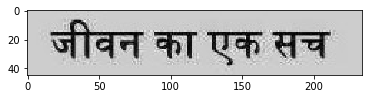

In [3]:
img = cv2.imread('hindi1.jpg',0)
plt.imshow(img,'gray')

In [4]:
def removeblank(charimg):
    
    cimg = charimg.copy()
    
    r,c = cimg.shape
    
    minrow = np.inf
    maxrow = -1*np.inf
    mincol = np.inf
    maxcol = -1*np.inf
    
    for i in range(r):
            
        for j in range(c):

            if(cimg[i][j]==255 and i<minrow):
                minrow = i


            if(cimg[i][j]==255 and i>maxrow):
                maxrow = i


            if(cimg[i][j]==255 and j<mincol):
                mincol = j


            if(cimg[i][j]==255 and j>maxcol):
                maxcol = j

    new = cimg[minrow:maxrow+1 , mincol:maxcol+1]
    
    return new

In [6]:
langName = []
lanc = 0
imgarr = []

path = './Datasets/'
dirs = os.listdir('./Datasets/')

for i in dirs:
    
  
    if(i[0]=='.'):
        continue
   

    print(i)
    
    st = path+i

    
    for j in os.listdir(st):
        
        
        if(j[0]=='.'):
            continue
            
        st2 = st+'/'+j
        
        count_img = 0
        
        for k in os.listdir(st2):
            
            if(k[0]=='.'):
                continue
            
            img = cv2.imread(st2+'/'+k, 0)
            
            count_img+=1
            
            if((i=='English' and count_img>180) or (i=='Hindi' and count_img>240)):
                break
            
            if(i=='Hindi'):
                random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                
            else:          
                random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            
            #check this
            img = img.astype('uint8')
            
            finimg = img
        
            finimg = removeblank(finimg)

            finimg = cv2.resize(finimg, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)

            random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            imgarr.append(finimg)
    
            langName.append(lanc)
            
    lanc = lanc+1

Tamil
English
Hindi


In [7]:
#convert list of class of images into desired form
labs = np_utils.to_categorical(langName)
labs.shape

(33474, 3)

In [50]:
labs

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [8]:
#to see image counts of all three categories loaded for training
np.unique(langName,return_counts=True)

(array([0, 1, 2]), array([12400, 10440, 10634]))

In [9]:
#converts image list to array
imgarr = np.array(imgarr).reshape((len(imgarr), 25, 25, 1))

In [10]:
model = Sequential()

model.add(Convolution2D(64, (3, 3), input_shape=(25, 25, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(labs.shape[1]))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          4624      
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 16)          0         
__________

In [11]:
hist = model.fit(imgarr, labs,
                epochs=40,
                shuffle=True,
                batch_size=100,
                validation_split=0.1)

Train on 30126 samples, validate on 3348 samples
Epoch 1/40
30126/30126 [==============================] - 47s 2ms/step - loss: 1.2486 - acc: 0.5373 - val_loss: 1.0745 - val_acc: 0.1356
Epoch 2/40
30126/30126 [==============================] - 48s 2ms/step - loss: 0.7129 - acc: 0.6738 - val_loss: 0.9315 - val_acc: 0.5227
Epoch 3/40
30126/30126 [==============================] - 45s 2ms/step - loss: 0.5623 - acc: 0.7663 - val_loss: 0.9229 - val_acc: 0.5806
Epoch 4/40
30126/30126 [==============================] - 43s 1ms/step - loss: 0.4870 - acc: 0.7991 - val_loss: 0.6487 - val_acc: 0.7180
Epoch 5/40
30126/30126 [==============================] - 49s 2ms/step - loss: 0.4486 - acc: 0.8134 - val_loss: 0.6117 - val_acc: 0.7524
Epoch 6/40
30126/30126 [==============================] - 49s 2ms/step - loss: 0.4155 - acc: 0.8295 - val_loss: 0.3785 - val_acc: 0.8692
Epoch 7/40
30126/30126 [==============================] - 48s 2ms/step - loss: 0.3955 - acc: 0.8405 - val_loss: 0.7381 - val_acc:

In [12]:
#to save cnn model

from keras.models import model_from_json
model_json = model.to_json()
with open("40epochs64kernels76.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("40epochs64kernels76.h5")
print("Saved model to disk")

Saved model to disk


MODEL1

In [272]:
# load json and create model
from keras.models import model_from_json
json_file = open('40epochs64kernels76.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("40epochs64kernels76.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model 

Loaded model from disk


MODEL2

In [183]:
# load json and create model
from keras.models import model_from_json
json_file = open('hindengtamwithcrop.json73', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("hindengtamwithcrop73.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model 

Loaded model from disk


In [298]:
def sepwords(Image, cord):
    img = Image.copy()
    finalCord = []
    area = []
    
    for n in range(len(cord)):
        #if not detected word i.e. ratio is less
        if(cord[n][2]/cord[n][3] < 2):

            finalCord.append(cord[n])
            area.append(cord[n][2]*cord[n][3])
            continue
            
        #extracting the word
        hinimg = img[cord[n][1]:cord[n][1]+cord[n][3], cord[n][0]:cord[n][0]+cord[n][2]].copy()
        #plt.subplot(4,1,1),plt.imshow(hinimg,'gray')
        #plt.title('Word',fontsize=6,loc='center'),plt.xticks([]),plt.yticks([])
        
        
        r,c = hinimg.shape
        maxpixel=0
        rowpixel=[]
        
        for i in range(r):
            curpixel=0   
            for j in range(c):

                curpixel+=hinimg[i][j]

            if curpixel>=maxpixel:
                maxpixel=curpixel
                rowOfline = i
                
            rowpixel.append(curpixel)

            
        for i in range(r):

            if rowpixel[i]>= 0.80*maxpixel:

                for j in  range(c):

                    hinimg[i][j] = 0
        
        hini = hinimg.copy()
        #plt.subplot(4,1,2),plt.imshow(hini,'gray')
        #plt.title('Word without shirorekha',fontsize=6,loc='center'),plt.xticks([]),plt.yticks([])
        
        char = []
        
        contours, hierarchy = cv2.findContours(hini,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            # get rectangle bounding contour
            [x, y, w, h] = cv2.boundingRect(contour)
            
            if(w/h<0.5):
                continue

            cv2.rectangle(hini, (x, y), (x + w, y + h), (150, 160, 154),2)
            
            #don't consider countours in upper zone
            if(y<rowOfline):
                continue
                

            finalCord.append((cord[n][0]+x, cord[n][1]+y-2, w, h+2))
            area.append(w*(h+2))  
    return finalCord

In [299]:
import cv2
cv2.__version__

'4.0.0'

(720, 945)
[[0.99050015 0.00368464 0.0058153 ]]
[[9.9992335e-01 2.7610015e-05 4.8941532e-05]]
[[9.9996769e-01 1.1643355e-05 2.0579249e-05]]
[[0.52012473 0.19253325 0.28734195]]
[[0.00193632 0.95122695 0.04683668]]
[[0.01176348 0.9311143  0.05712223]]
[[9.999999e-01 4.872812e-08 9.460879e-08]]
[[9.999993e-01 2.753966e-07 4.794046e-07]]
[[9.9837995e-01 6.0319208e-04 1.0168586e-03]]
[[9.9999654e-01 1.2490350e-06 2.2290039e-06]]
[[9.996275e-01 9.800713e-05 2.745982e-04]]
[[0.52012473 0.19253325 0.28734195]]
[[9.9999857e-01 5.1405988e-07 8.9996718e-07]]
[[0.01128204 0.93329275 0.05542519]]
[[0.03067509 0.19105758 0.7782673 ]]
[[0.00995762 0.93808055 0.05196187]]
[[0.8909146  0.00684843 0.10223688]]
[[9.9999964e-01 1.0442158e-07 2.0085831e-07]]
[[0.94677186 0.00435119 0.04887688]]
[[9.996275e-01 9.800713e-05 2.745982e-04]]
[[0.88250613 0.04598731 0.07150652]]
[[0.52012473 0.19253325 0.28734195]]
[[0.00594187 0.95299476 0.04106334]]
[[9.9998569e-01 5.2184705e-06 9.1098491e-06]]
[[1.0000000e+0

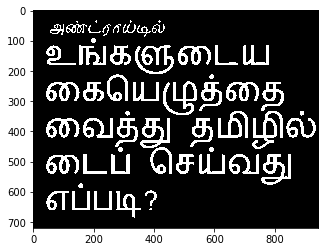

In [300]:
Image=cv2.imread('tamil.jpg', 0)
area_pred = []

rimg , cimg = Image.shape
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

Image = clahe.apply(Image)


I=Image.copy()

i=Image.copy()
print(i.shape)
chars = []
#Otsu Thresholding
blur = cv2.GaussianBlur(Image,(1,1),0)

ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)




# kernel = np.ones((3,3),np.uint8)
# th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)


# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(th > 0))
angle = cv2.minAreaRect(coords)[-1]
 

# # the `cv2.minAreaRect` function returns values in the
# # range [-90, 0); as the rectangle rotates clockwise the
# # returned angle trends to 0 -- in this special case we
# # need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)

    
else:    
     angle = - angle
    

# # rotate the image to deskew it
(h, w) = Image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
th = cv2.warpAffine(th, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)


plt.figure(0)
plt.imshow(th, cmap = 'gray')


contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

chars=[]
area = []
for contour in contours:
    # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)
        
    chars.append((x,y,w,h))
    area.append(w*h)



newchar =[]
i = th.copy()


newchar = sepwords(th,chars)
chars = newchar


checkar = []
checkarlab = []
checkcord = []
pred = {}
count = 0

prd = {'Hindi':0 , 'English':0 , 'Tamil':0}

for n in range(len(chars)):
    
    finimg = i[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
    
    if(finimg.shape[0]*finimg.shape[1] > rimg*cimg*0.00015 ):
        
        
        
        
        checkcord.append(chars[n])
        

        finimg = finimg.astype('uint8')
        random, finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        

        finimg = cv2.resize(finimg, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)
    
        

        random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        
        checkar.append(finimg)
        

        finimg = np.array(finimg).reshape(( -1,25, 25, 1))
        predval = model.predict(finimg)
        
        print(predval)
        
        if(predval[0][0]>=0.5):
            prd['Tamil']+=1
            
        
        elif(predval[0][1]>=0.5):
            prd['English']+=1
            
        
        elif(predval[0][2]>=0.5):
            prd['Hindi']+=1
            
            
        try:
            pred[np.argmax(predval)]=pred[np.argmax(predval)]+1

        except:
            
            pred[np.argmax(predval)]=1

        
        count += 1
        checkarlab.append(predval)
        

print(pred)

In [296]:
max(prd, key=prd.get)

'Tamil'

In [297]:
res=max(pred,key=pred.get)

if(res==0):
    print('Tamil')
elif(res==1):
    print('English')
else:
    print('Hindi')

Tamil


PRACTICE:

In [ ]:
# #only contour part(not project part)


# img = cv2.imread('hindi1.jpg',0)
# plt.imshow(img, cmap='gray')

# #read this: clahe
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# img = clahe.apply(img)


# blur = cv2.GaussianBlur(img,(1,1),0)
# ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# ########remove skew(angle)
# coords = np.column_stack(np.where(thresh > 0))
# angle = cv2.minAreaRect(coords)[-1]

# if angle < -45:
#     angle = -(90 + angle)

    
# else:    
#     angle = - angle


# (h, w) = thresh.shape[:2]
# center = (w // 2, h // 2)
# M = cv2.getRotationMatrix2D(center, angle, 1.0)
# th = cv2.warpAffine(thresh, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# #########

# contours,hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Image=th.copy()


# area = []
# cord = []

# for contour in contours:
#     #get rectangle bounding contour
#     [x, y, w, h] = cv2.boundingRect(contour)
#     cv2.rectangle(Image, (x, y), (x + w, y + h), (150, 160, 154),2)
    
#     if(w*h>20):
#         cord.append((x,y,w,h))
#         area.append(w*h)
    
# newchar =[]
# newchar = sepwords(Image,cord[1:])
    

# plt.subplot(2,1,1),plt.imshow(th,'gray')
# plt.title('Image'),plt.xticks([]),plt.yticks([])

# plt.subplot(2,1,2),plt.imshow(Image,'gray')
# plt.title('Image with contours'),plt.xticks([]),plt.yticks([])
